In [1]:
# 先檢查是否存在 HappyML 這個資料夾，若沒有，則下載
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

# 資料集前處理

## 載入資料集

In [2]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [3]:
print(dataset)
print('-'*80)
print(dataset.keys())
print('-'*80)
print(dataset['DESCR'])
print('-'*80)
print(dataset['data'])
print('-'*80)
print(dataset['target'])
print('-'*80)
print(dataset['feature_names'])

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

## 切分自變數與應變數

In [4]:
import HappyML.preprocessor as pp

# Decomposition
import pandas as pd
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
Y = pd.DataFrame(dataset.target, columns=["Price"])

In [5]:
print(X)
print('-'*80)
print(Y)
print('-'*80)
print(X.info())
print('-'*80)
print(X.describe())

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

## 切分訓練集、測試集與特徵縮放

In [6]:
# Split Training vs. Testing Data
X_train, X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size=0.8)

# Feature Scaling (Optional)
X_train, X_test = pp.feature_scaling(fit_ary=X_train, transform_arys=(X_train, X_test))

# 建構神經網路

## 建構神經網路各層級

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Add Layers with .add() function
model = Sequential()

# Using Formula #2, Instance=20640, alpha=5
model.add(Dense(input_dim=X_train.shape[1], units=459, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=9, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear"))

In [8]:
print(model.summary())
print('-'*80)
print(model.inputs)
print('-'*80)
print(model.outputs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 459)               4131      
                                                                 
 dense_1 (Dense)             (None, 9)                 4140      
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 8281 (32.35 KB)
Trainable params: 8281 (32.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
--------------------------------------------------------------------------------
[<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_input')>]
--------------------------------------------------------------------------------
[<KerasTensor: shape=(None, 1) dtype=fl

## 神經網路編譯

In [9]:
# Compile the whole Neural Networks
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

# 模型訓練與校正

## 模型訓練

In [10]:
# Training (Fit)
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=50)

Epoch 1/50
2642/2642 [==============================] - 17s 4ms/step - loss: 0.4839 - mse: 0.4839 - val_loss: 0.4164 - val_mse: 0.4164
Epoch 2/50
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3726 - mse: 0.3726 - val_loss: 0.3673 - val_mse: 0.3673
Epoch 3/50
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3463 - mse: 0.3463 - val_loss: 0.3433 - val_mse: 0.3433
Epoch 4/50
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3293 - mse: 0.3293 - val_loss: 0.3883 - val_mse: 0.3883
Epoch 5/50
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3212 - mse: 0.3212 - val_loss: 0.3399 - val_mse: 0.3399
Epoch 6/50
2642/2642 [==============================] - 11s 4ms/step - loss: 0.3163 - mse: 0.3163 - val_loss: 0.3634 - val_mse: 0.3634
Epoch 7/50
2642/2642 [==============================] - 11s 4ms/step - loss: 0.3105 - mse: 0.3105 - val_loss: 0.3416 - val_mse: 0.3416
Epoch 8/50
2642/2642 [==============================] -

## 模型校正

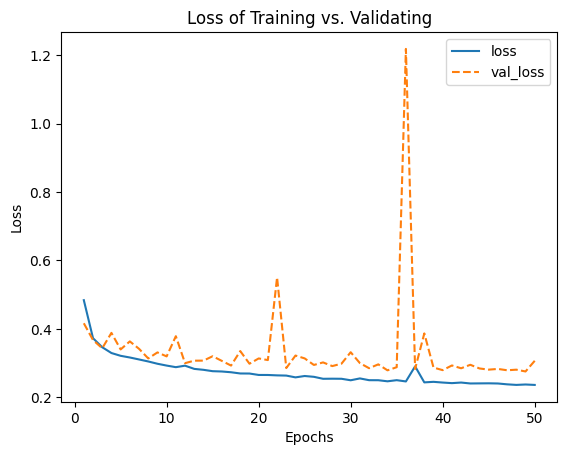

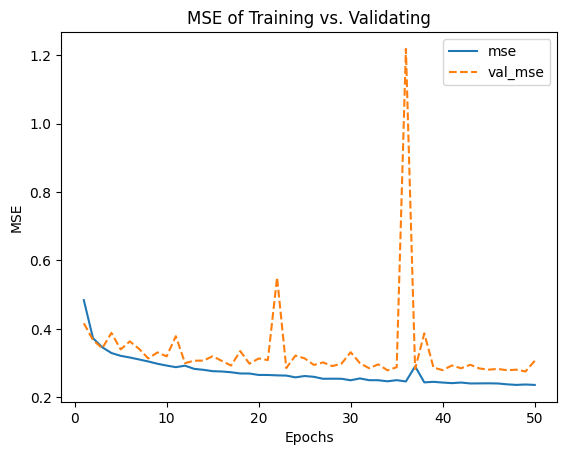

In [11]:
# Model Adjustment
import HappyML.model_drawer as md

md.epochs_metrics_plot(epochs_metrics.history, keys=("loss", "val_loss"), title="Loss of Training vs. Validating", xyLabel=("Epochs", "Loss"))
md.epochs_metrics_plot(epochs_metrics.history, keys=("mse", "val_mse"), title="MSE of Training vs. Validating", xyLabel=("Epochs", "MSE"))

# 模型預測與評估

## 模型預測

In [12]:
# Predict
import pandas as pd
Y_pred = pd.DataFrame(model.predict(x=X_test), index=Y_test.index, columns=Y_test.columns)

# Show the Predict Result
df = pd.concat([Y_test, Y_pred], axis=1)
print(df)

129/129 [==============================] - 0s 1ms/step
         Price     Price
4456   1.48800  1.642469
19986  0.63100  0.654046
9472   0.96600  0.907411
3518   2.23300  2.269091
14907  1.60100  1.990482
...        ...       ...
8331   1.24300  1.353265
8399   1.81700  1.743550
1369   1.50800  1.511678
1581   4.94000  3.431386
18341  5.00001  4.767762

[4128 rows x 2 columns]


# 模型評估

In [13]:
# Evaluation
test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set:", test_mse)

129/129 [==============================] - 0s 2ms/step - loss: 0.2994 - mse: 0.2994
Loss of Testing Set: 0.29936519265174866
MSE of Testing Set: 0.29936519265174866
